# Smart Mobility Traffic Analysis


# PROVA CLA

In [ ]:
#Importiamo le librerie 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import joblib

#Leggiamo il dataset
dataset = pd.read_csv('smart_mobility_dataset.csv')

dataset.head()


,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,Yellow,Clear,0,-0.609199,2,45,450.760055,19.574337,High
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,Green,Clear,0,0.965442,16,1,321.800341,5.385554,High
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,Green,Rain,0,0.289660,16,49,231.152655,10.277477,High
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,Red,Fog,0,-0.271965,66,10,410.384292,29.243279,High
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,Red,Snow,0,-0.797606,3,5,364.466342,16.801459,Low


## 1 - Analisi Preliminare

In [52]:
#Visualizziamo i tipi delle colonne
print(f"{dataset.dtypes}\n")

print("Number of rows: ", dataset.shape[0])
print("Number of columns: ", dataset.shape[1])

Timestamp                  object
Latitude                  float64
Longitude                 float64
Vehicle_Count               int64
Traffic_Speed_kmh         float64
Road_Occupancy_%          float64
Traffic_Light_State        object
Weather_Condition          object
Accident_Report             int64
Sentiment_Score           float64
Ride_Sharing_Demand         int64
Parking_Availability        int64
Emission_Levels_g_km      float64
Energy_Consumption_L_h    float64
Traffic_Condition          object
dtype: object

Number of rows:  5000
Number of columns:  15


In [54]:
# calcolo statistiche descrittive
dataset.describe()

,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.749645,-73.847433,153.921200,42.111096,54.748397,0.096000,-0.005652,50.487800,24.613000,272.174927,17.343243
std,0.086123,0.086204,83.523342,21.707720,26.145238,0.294621,0.583790,28.484426,14.532511,130.086372,7.208277
min,40.600016,-73.999987,10.000000,5.002789,10.005031,0.000000,-0.999819,1.000000,0.000000,50.136855,5.003787
25%,40.675403,-73.920281,80.000000,23.195752,32.089653,0.000000,-0.500154,26.000000,12.000000,160.564433,11.098761
50%,40.748875,-73.846058,156.000000,42.191599,54.657297,0.000000,-0.010564,50.000000,24.000000,272.045513,17.153791
75%,40.824735,-73.771685,226.000000,60.751760,77.581720,0.000000,0.500518,75.000000,37.000000,382.242055,23.516595
max,40.899972,-73.700159,299.000000,79.997556,99.999729,1.000000,0.999354,99.000000,49.000000,499.922663,29.995416


In [53]:
#Verifica dati mancanti 
missing_values = dataset.isnull().sum()
print(missing_values)

Timestamp                 0
Latitude                  0
Longitude                 0
Vehicle_Count             0
Traffic_Speed_kmh         0
Road_Occupancy_%          0
Traffic_Light_State       0
Weather_Condition         0
Accident_Report           0
Sentiment_Score           0
Ride_Sharing_Demand       0
Parking_Availability      0
Emission_Levels_g_km      0
Energy_Consumption_L_h    0
Traffic_Condition         0
dtype: int64


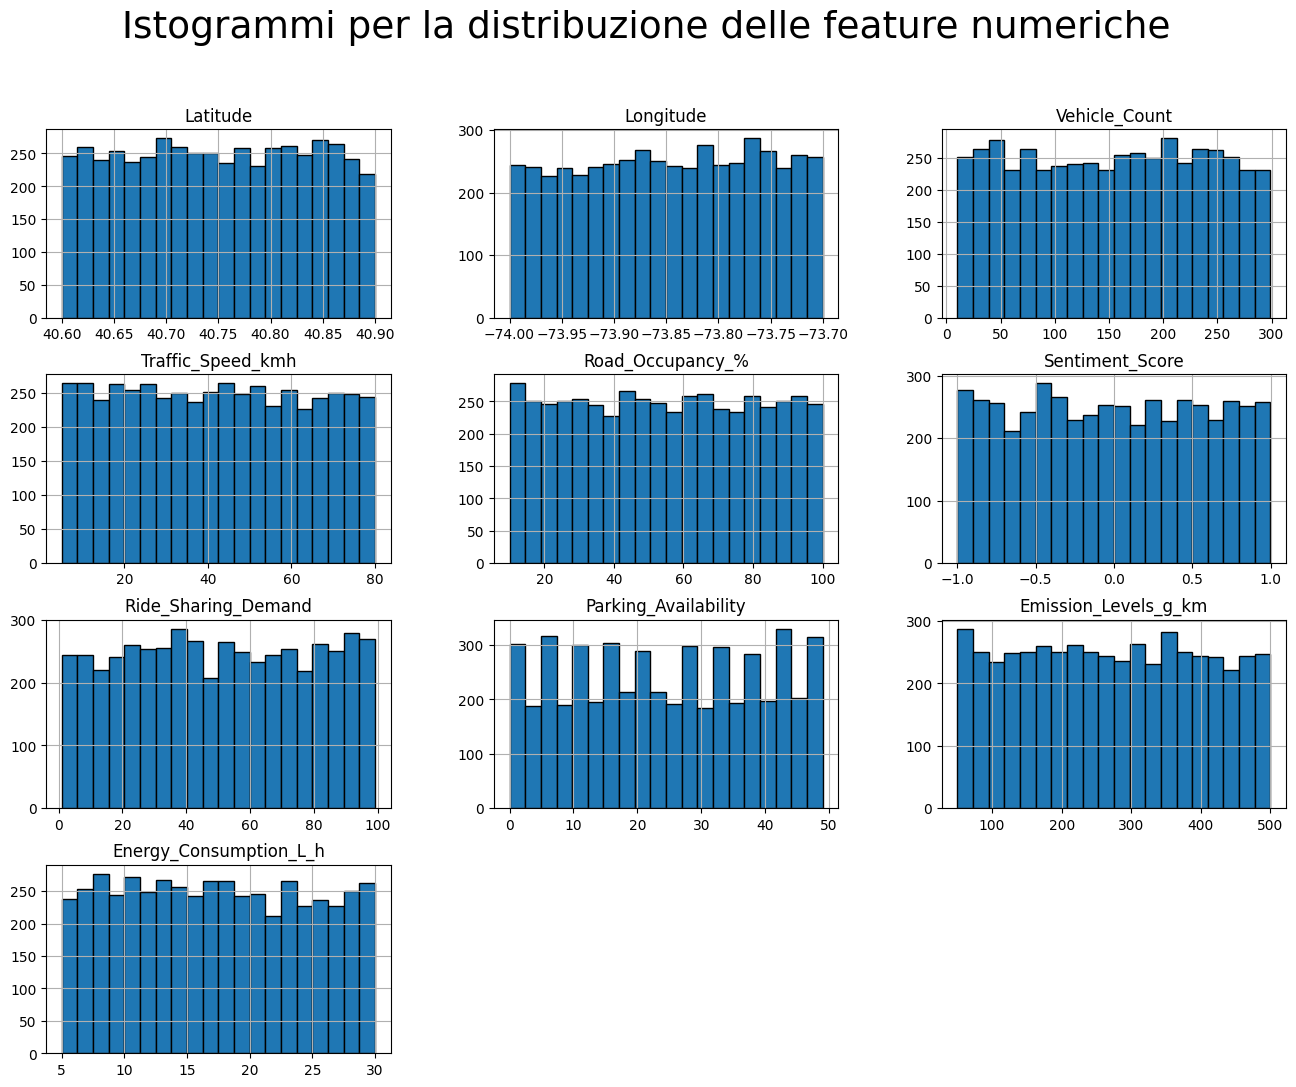

In [69]:
# Istogrammi per la distribuzione delle feature numeriche

# Elenco delle colonne da escludere
columns_to_exclude = ['Traffic_Light_State', 'Weather_Condition', 'Accident_Report', 'Traffic_Condition']

# Creiamo il subset dei dati senza le feature da escludere
data_subset = dataset.drop(columns=columns_to_exclude)
data_subset.hist(bins=20, figsize=(16, 12), edgecolor='black')
plt.suptitle("Istogrammi per la distribuzione delle feature numeriche", fontsize=27)
plt.show()

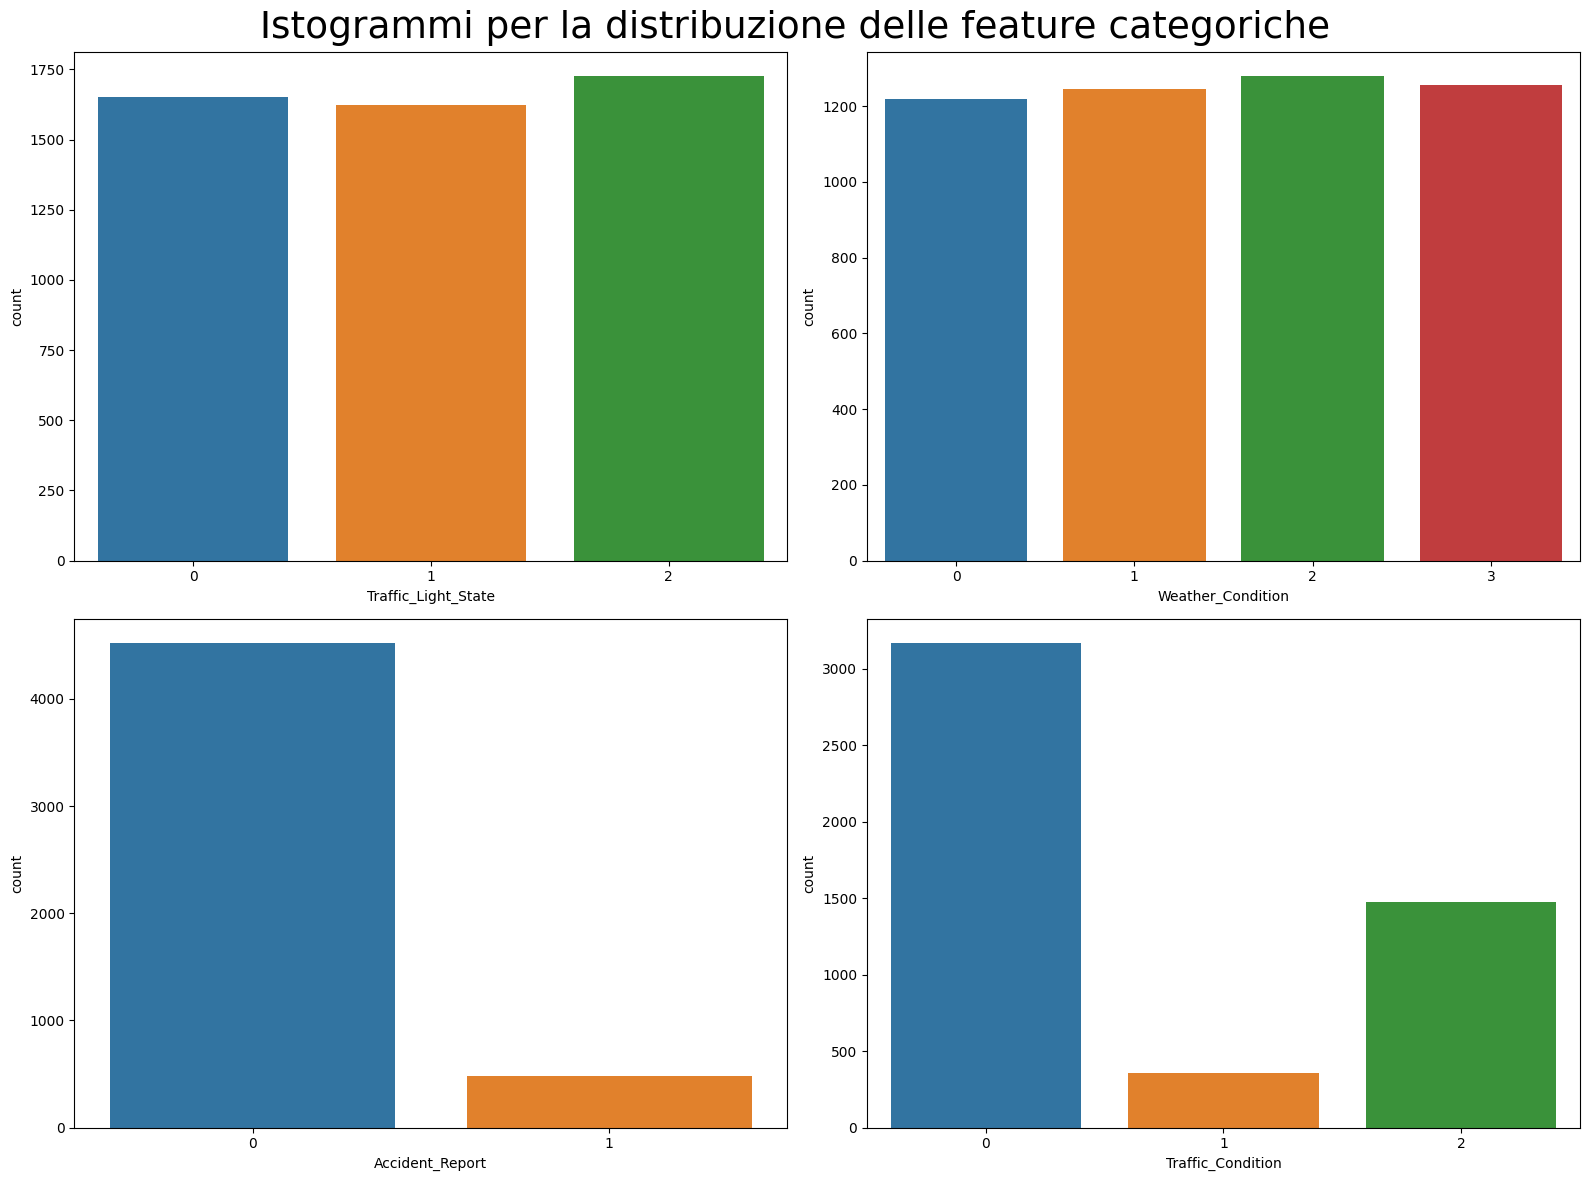

In [67]:
# Istogrammi per le features categoriche
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(data=dataset, x='Traffic_Light_State', ax=axes[0, 0])
sns.countplot(data=dataset, x='Weather_Condition', ax=axes[0, 1])
sns.countplot(data=dataset, x='Accident_Report', ax=axes[1, 0])
sns.countplot(data=dataset, x='Traffic_Condition', ax=axes[1, 1])
plt.suptitle("Istogrammi per la distribuzione delle feature categoriche", fontsize=27)
plt.tight_layout()
plt.show()

## 2 - Preparazione dei dati

### Label encoding e il one-hot encoding
Per poter calcolare la matrice di correlazione trasformiamo le variabili categoriche in numeriche

### 2.1 - Label encoding

In [55]:
# Inizializziamo il LabelEncoder
encoder = LabelEncoder()

# Applichiamo il Label Encoding solo a due colonne
columns_to_encode = ['Traffic_Light_State', 'Weather_Condition', 'Traffic_Condition']
for col in columns_to_encode:
    dataset[col] = encoder.fit_transform(dataset[col])

In [72]:
dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,2,0,0,-0.609199,2,45,450.760055,19.574337,0
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,0,0,0,0.965442,16,1,321.800341,5.385554,0
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,0,2,0,0.289660,16,49,231.152655,10.277477,0
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,1,1,0,-0.271965,66,10,410.384292,29.243279,0
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,1,3,0,-0.797606,3,5,364.466342,16.801459,1


### 2.2 - One-hot encoding

In [73]:
#Usiamo il One-hot encoding per la colonna di Traffic_Condition avendo un certo ordine
######### TRASFORMARE TIMESTAMP ######
dataset=pd.get_dummies(dataset, columns=['Traffic_Condition'])

In [44]:
dataset.head()

,Timestamp,Latitude,Longitude,Vehicle_Count,Traffic_Speed_kmh,Road_Occupancy_%,Traffic_Light_State,Weather_Condition,Accident_Report,Sentiment_Score,Ride_Sharing_Demand,Parking_Availability,Emission_Levels_g_km,Energy_Consumption_L_h,Traffic_Condition_High,Traffic_Condition_Low,Traffic_Condition_Medium
0,2024-03-01 00:00:00,40.842275,-73.703149,205,49.893435,82.652780,2,0,0,-0.609199,2,45,450.760055,19.574337,1,0,0
1,2024-03-01 00:05:00,40.831119,-73.987354,202,22.383965,45.829298,0,0,0,0.965442,16,1,321.800341,5.385554,1,0,0
2,2024-03-01 00:10:00,40.819549,-73.732462,252,46.889699,82.772465,0,2,0,0.289660,16,49,231.152655,10.277477,1,0,0
3,2024-03-01 00:15:00,40.725849,-73.980134,37,5.730536,37.695567,1,1,0,-0.271965,66,10,410.384292,29.243279,1,0,0
4,2024-03-01 00:20:00,40.813265,-73.961631,64,61.348034,22.313358,1,3,0,-0.797606,3,5,364.466342,16.801459,0,1,0


In [71]:
# Verifichiamo l'aggiornamento delle colonne
print(f"{dataset.dtypes}\n")

Timestamp                  object
Latitude                  float64
Longitude                 float64
Vehicle_Count               int64
Traffic_Speed_kmh         float64
Road_Occupancy_%          float64
Traffic_Light_State         int32
Weather_Condition           int32
Accident_Report             int64
Sentiment_Score           float64
Ride_Sharing_Demand         int64
Parking_Availability        int64
Emission_Levels_g_km      float64
Energy_Consumption_L_h    float64
Traffic_Condition           int32
dtype: object



## Matrice di correlazione

Matrice di correlazione:



Text(0.5, 1.0, 'Matrice di correlazione')

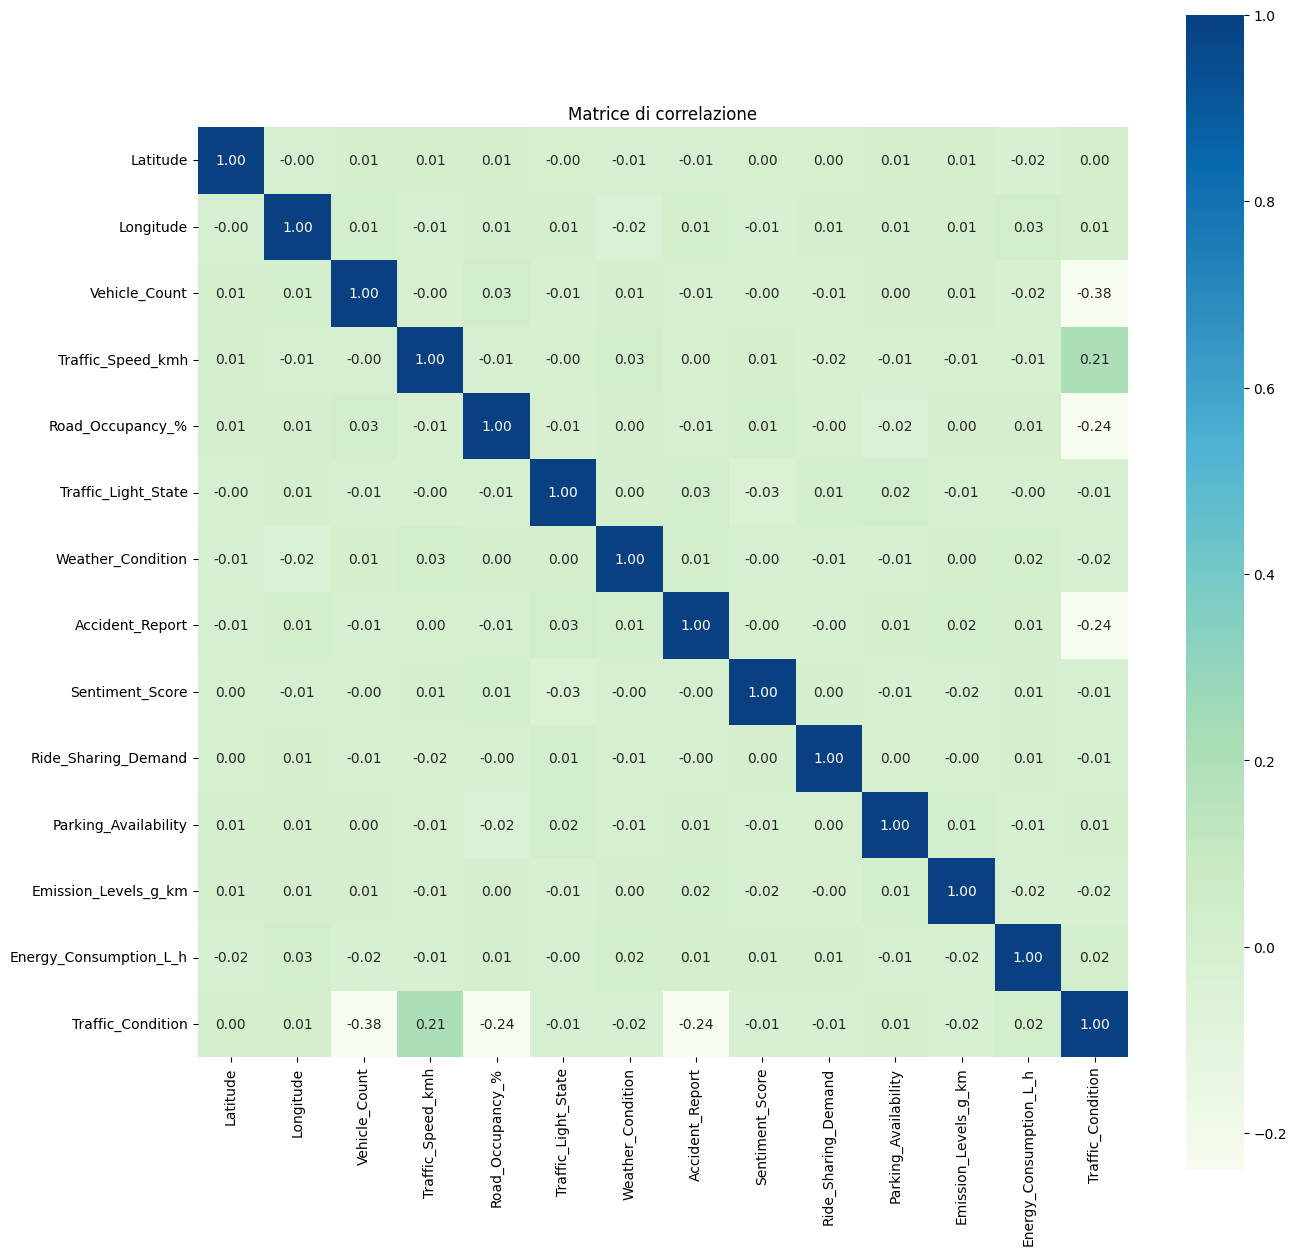

In [58]:
print('Matrice di correlazione:\n')
corr_matrix = dataset.corr(numeric_only=True)
plt.figure(figsize=(15,15))
plot = sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', cmap='GnBu', robust=True)
plt.title('Matrice di correlazione')

# CIAO GG

CIAO2